In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import log_loss

In [4]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('adult_dataset.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
# rows with missing values represented as'?'.
data_1 = data[data.workclass == '?']
data_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K


In [10]:
# select all categorical variables
df_categorical = data.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

In [12]:
# dropping the "?"s
data = data[data['occupation'] != '?']
data = data[data['native.country'] != '?']
data = data[data['workclass'] != '?']
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [15]:
# select all categorical variables
df_categorical = data.select_dtypes(include='object')
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [16]:
# encode categorical variables using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [17]:
# concat df_categorical with original data
data = data.drop(df_categorical.columns, axis=1)
data = pd.concat([data, df_categorical], axis=1)
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [19]:
# convert target variable income to categorical
data['income'] = data['income'].astype('category')

In [20]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [22]:
# Putting feature variable to X
X = data.drop('income',axis=1)

# Putting response variable to y
y = data['income']

In [23]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.shape,y_train.shape

((21113, 14), (21113,))

In [24]:
#Model building based on default Parameter
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
y_pred = model_dt.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.86      0.87      6867
          1       0.60      0.63      0.61      2182

avg / total       0.81      0.81      0.81      9049



In [27]:
confusion_matrix(y_test,y_pred)

array([[5935,  932],
       [ 810, 1372]], dtype=int64)

In [29]:
#Accuracy Score
accuracy_score(y_test,y_pred)

0.8074925406122223

In [32]:
#Predict Probalility 
y_prob=model_dt.predict_proba(X_test)

In [33]:
#AUC Score
roc_auc_score(y_test,y_prob[:,1])

0.7465296840039312

In [34]:
auc_value=roc_auc_score(y_test,y_prob[:,1])

In [35]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob[:,1])

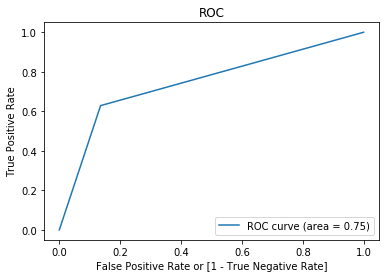

In [36]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [37]:
#Log Loss
log_loss(y_pred,y_prob)

9.992007221626413e-16

In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043112,0.007635,0.001427,0.000467,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841804,0.004273,13,0.844040,0.841385,0.842342,0.841158,0.847552,0.843296,0.002358
1,0.038625,0.003171,0.001621,0.000510,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841804,0.004273,13,0.844040,0.841385,0.842342,0.841158,0.847552,0.843296,0.002358
2,0.037961,0.001906,0.001197,0.000400,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841614,0.004241,15,0.844040,0.841208,0.842342,0.841158,0.846960,0.843142,0.002177
3,0.039870,0.003920,0.001399,0.000486,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841614,0.004241,15,0.844040,0.841208,0.842342,0.841158,0.846960,0.843142,0.002177
4,0.062015,0.006640,0.001596,0.000489,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842330,...,0.849903,0.004545,3,0.854698,0.853345,0.854597,0.852288,0.855485,0.854083,0.001129


In [43]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8514659214701843
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [44]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

In [46]:
y_pred = clf_gini.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6867
          1       0.73      0.60      0.66      2182

avg / total       0.84      0.85      0.85      9049



In [47]:
confusion_matrix(y_test,y_pred)

array([[6383,  484],
       [ 865, 1317]], dtype=int64)

In [48]:
#Accuracy Score
accuracy_score(y_test,y_pred)

0.850922753895458

In [53]:
#Predict Probalility 
y_prob=clf_gini.predict_proba(X_test)

In [54]:
#AUC Score
roc_auc_score(y_test,y_prob[:,1])

0.8976450824137063

In [55]:
auc_value=roc_auc_score(y_test,y_prob[:,1])

In [56]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob[:,1])

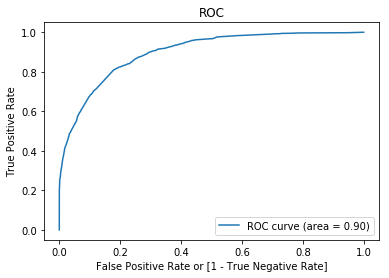

In [57]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()